# Check Response Functions
This notebook has two topics:
1. It checks the step response functions by numerically integrating the impulse response functions.
2. It compares the Polder, Hantush, and HantushWell response functions to their classical equivalents and gives relationships between the parameters used in Pastas and the aquifer parameters used in the classical functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pastas as ps

In [21]:
plt.rcParams["figure.figsize"] = [3.6, 2.4]
plt.rcParams["font.size"] = 8

## Comparison of step function with numerical integration of the impulse response function

### Gamma

In [22]:
ps.Gamma.impulse

In [23]:
A = 5
n = 1.5
a = 50
p = [A, n, a]

gamma = ps.Gamma()
tmax = gamma.get_tmax(p)
t = np.arange(0, tmax)

step = gamma.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(gamma.impulse, 0, t[i], args=(p))[0]

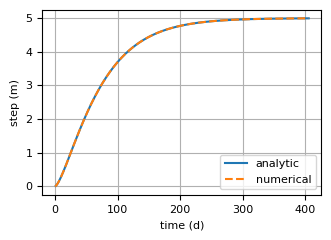

In [24]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

### Exponential

In [25]:
ps.Exponential.impulse

In [26]:
A = 5
a = 50
p = [A, a]

exponential = ps.Exponential()
tmax = exponential.get_tmax(p)
t = np.arange(0, tmax)

step = exponential.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(exponential.impulse, 0, t[i], args=(p))[0]

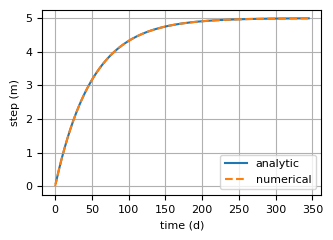

In [27]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

### Hantush

In [28]:
ps.Hantush.impulse

In [29]:
A = 5
a = 50
b = 2
p = [A, a, b]

hantush = ps.Hantush()
tmax = hantush.get_tmax(p)
t = np.arange(0, tmax)

step = hantush.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(hantush.impulse, 0, t[i], args=(p))[0]

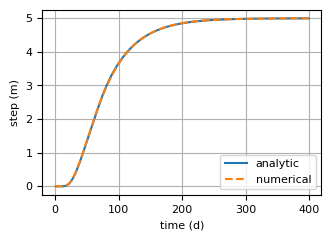

In [30]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

### Polder

In [31]:
ps.Polder.impulse

In [32]:
A = 5
a = 100
b = 0.25
p = [A, a, b]

polder = ps.Polder()
tmax = polder.get_tmax(p)
t = np.arange(0, tmax)

step = polder.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(polder.impulse, 0, t[i], args=(p))[0]

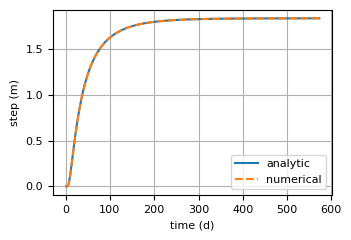

In [33]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

### Four-parameter function

In [34]:
ps.FourParam.impulse

In [35]:
A = 1  # impulse response implemented for A=1 only
n = 1.5
a = 50
b = 10
p = [A, n, a, b]

fourparam = ps.FourParam(quad=False)  # use simple integration
tmax = fourparam.get_tmax(p)
t = np.arange(0, tmax)

step = fourparam.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(fourparam.impulse, 0, t[i], args=(p))[0]
stepnum = (
    stepnum / quad(fourparam.impulse, 0, np.inf, args=p)[0]
)  # four param is scaled at the end

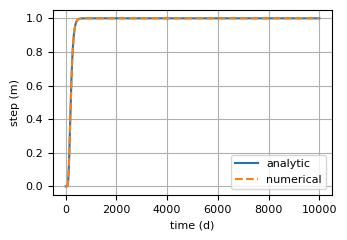

In [36]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

### Double exponential function

In [37]:
ps.DoubleExponential.impulse

In [38]:
A = 5  # impulse response implemented for A=1 only
a = 10
b = 50
f = 0.4
p = [A, f, a, b]

doubexp = ps.DoubleExponential()
tmax = doubexp.get_tmax(p)
t = np.arange(0, tmax)

step = doubexp.step(p)
stepnum = np.zeros(len(t))
for i in range(1, len(t)):
    stepnum[i] = quad(doubexp.impulse, 0, t[i], args=(p))[0]

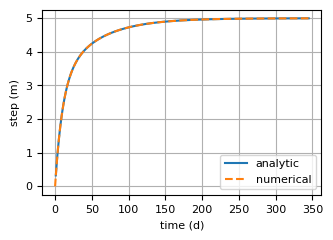

In [39]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum, "--", label="numerical")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

### Kraijenhoff

#### Kraijenhoff van de Leur

##### Impulse Response
from [A study of non-steady groundwater flow with special reference to a reservoir-coefficient (1958)](https://edepot.wur.nl/422032) formula 2

$ \theta(t) = \frac{4N}{\pi S} \sum_{n=1,3,5...}^\infty \left( \frac{1}{n} \exp{\left( {-n^2\frac{\pi^2T}{SL^2} t} \right)} \sin \left(\frac{n\pi x}{L}\right) \right) $

##### Step Response

The step response is obtained by taking the integral of the impulse response function

$ \Theta(t) = \frac{4 N}{\pi S} \sum_{n=1,3,5...}^\infty \frac{1}{n^3} \left(\frac{SL^2}{\pi^2 T} - \frac{SL^2}{\pi^2 T} \exp\left(-n^2\frac{\pi^2T}{SL^2}t\right)\right)  \sin \left(\frac{n\pi x}{L}\right) $

$ \Theta(t) = \frac{4 N L^2}{\pi^3 T} \sum_{n=1,3,5...}^\infty \frac{1}{n^3} \left(1 - \exp\left(-n^2\frac{\pi^2T}{SL^2}t\right)\right)  \sin \left(\frac{n\pi x}{L}\right)$

And $\sum_{n=1,3,5...}^\infty n = \sum_{n=0}^\infty (2n+1)$ gives:

$ \Theta(t) = \frac{4 N L^2}{\pi^3 T} \sum_{n=0}^\infty \frac{1}{(2n+1)^3} \left(1 - \exp\left(-(2n+1)^2\frac{\pi^2T}{SL^2}t)\right)\right)  \sin \left(\frac{(2n+1)\pi x}{L}\right)$


Kraijenhoff van de Leur takes $\frac{x}{L}=\frac{1}{2}$ as the middle of the domain. 

#### Bruggeman 

from Analytical Solutions of Geohydrological Problems (1999) formula 133.15

##### Step Response

$ \Theta(t) = \frac{-N}{2T}\left(x^2 - \frac{1}{4}L^2\right) - \frac{4NL^2}{\pi^3T} \sum_{n=0}^\infty
\frac{(-1)^n}{(2n + 1)^3} \cos\left(\frac{(2n+1)\pi x}{L}\right)
\exp\left(-\frac{(2n+1)^2\pi^2 T}{SL^2}t\right)
$

$ \Theta(t) = \frac{-NL^2}{2T}\left(\left(\frac{x}{L}\right)^2 - \frac{1}{4}\right) - \frac{4NL^2}{\pi^3T} \sum_{n=0}^\infty
\frac{(-1)^n}{(2n + 1)^3} 
\exp\left(-\frac{(2n+1)^2\pi^2 T}{SL^2}t\right) \cos\left(\frac{(2n+1)\pi x}{L}\right)
$

$ \Theta(t) = \frac{-NL^2}{2T}\left(\left(\frac{x}{L}\right)^2 - \tfrac{1}{4}\right) \left(1 - \frac{8}{\pi^3 \left(\frac{1}{4} - \left(\frac{x}{L}\right)^2\right)} \sum_{n=0}^\infty
\frac{(-1)^n}{(2n + 1)^3} 
\exp\left(-\frac{(2n+1)^2\pi^2 T}{SL^2}t\right) \cos\left(\frac{(2n+1)\pi x}{L}\right) \right)
$

Note that $x=0$ is the middle of the domain for Bruggeman.

#### Pastas Implementation

In Pastas the Bruggeman response function is computed and the parameters are transformed to:

Scale parameter (such that the gain is always $A$):

$A = \frac{-NL^2}{2T}\left(\left(\frac{x}{L}\right)^2 - \tfrac{1}{4}\right)$

Reservoir coefficient (also known as $j$ in Kraijenhoff):

$a = \frac{SL^2}{\pi^2 T}$

Location in the domain:

$b = \frac{x}{L}$


Such that the step response becomes:

$ \Theta(t) = A\left(1 - \frac{8}{\pi^3(\frac{1}{4} - b^2)} \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)^3} \cos\left((2n+1)\pi b\right)\exp\left(-\frac{(2n+1)^2t}{a}\right) \right)$

Taking the derivative gives the impulse response:

In [40]:
ps.Kraijenhoff.impulse

In [41]:
A = 5
a = 10
b = 0.25
p = [A, a, b]

khoff = ps.Kraijenhoff()
tmax = khoff.get_tmax(p)
t = np.arange(0, tmax)

step = khoff.step(p)
stepnum_brug = np.zeros(len(t))

for i in range(1, len(t)):
    stepnum_brug[i] = quad(khoff.impulse, 0, t[i], args=(p))[0]

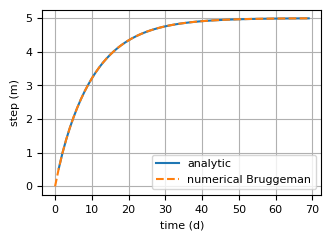

In [43]:
plt.plot(t[1:], step, label="analytic")
plt.plot(t, stepnum_brug, "--", label="numerical Bruggeman")
plt.xlabel("time (d)")
plt.ylabel("step (m)")
plt.grid()
_ = plt.legend()  # try to show figure in readthedocs

## Comparison to classical analytical response functions

### Polder step function compared to classic polder function
The classic polder function is (Eq. 123.32 in Bruggeman, 1999)

$$
h(t) = \Delta h \text{P}\left(\frac{x}{2\lambda}, \sqrt{\frac{t}{cS}}\right)
$$

where P is the polder function.

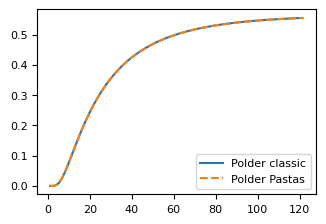

In [44]:
from scipy.special import erfc


def polder_classic(t, x, T, S, c):
    X = x / (2 * np.sqrt(T * c))
    Y = np.sqrt(t / (c * S))
    rv = 0.5 * np.exp(2 * X) * erfc(X / Y + Y) + 0.5 * np.exp(-2 * X) * erfc(X / Y - Y)
    return rv


delh = 2
T = 20
c = 5000
S = 0.01
x = 400
x / np.sqrt(c * T)
t = np.arange(1, 121)
h_polder_classic = np.zeros(len(t))
for i in range(len(t)):
    h_polder_classic[i] = delh * polder_classic(t[i], x=x, T=T, S=S, c=c)
#
A = delh
a = c * S
b = x**2 / (4 * T * c)
hpd = polder.step([A, a, b], dt=1, cutoff=0.95)
#
plt.plot(t, h_polder_classic, label="Polder classic")
plt.plot(np.arange(1, len(hpd) + 1), hpd, label="Polder Pastas", linestyle="--")
plt.legend()

### Hantush step function compared to classic Hantush function
The classic Hantush function is 

$$
h(r, t) = \frac{-Q}{4\pi T}\int_u  ^\infty  \exp\left(-y - \frac{r^2}{4  \lambda^2 y} \right) \frac{\text{d}y}{y} 
$$

where

$$
u=\frac{r^2 S}{4 T t}
$$

For large time, the classic Hantush function goes to

$$
\lim_{t\to\infty} h(r, t) = \frac{-Q}{2\pi T}\text{K}_0(r/\lambda)
$$

where $\lambda^2=cT$. 
The classic Hantush function is a step function. The impulse response function $\theta$ is obtained by differentiation

$$
\theta(t) = \frac{\partial h}{\partial t} = \frac{-Q}{4\pi Tt} \exp\left(\frac{-t}{cS} -\frac{r^2cS}{4cTt}\right)
$$

The Hantush impulse response function used in Pastas is defined as

$$
\theta(t) = A\frac{1}{2\text{K}_0(2\sqrt{b})} \frac{1}{t} e^{-t/a - ab/t} 
$$

Hence, the parameters in Pastas are related to the classic Hantush function as

$$
A = -\frac{\text{K}_0(2\sqrt{b})}{2\pi T}
$$

$$
a = cS
$$

$$
b = \frac{r^2}{4\lambda^2}
$$

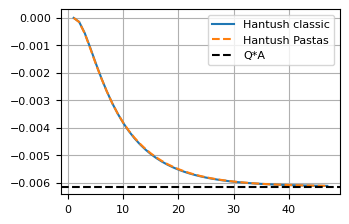

In [45]:
from scipy.integrate import quad
from scipy.special import k0


def integrand_hantush(y, r, lab):
    return np.exp(-y - r**2 / (4 * lab**2 * y)) / y


def hantush_classic(t=1, r=1, Q=1, T=100, S=1e-4, c=1000):
    lab = np.sqrt(T * c)
    u = r**2 * S / (4 * T * t)
    F = quad(integrand_hantush, u, np.inf, args=(r, lab))[0]
    return -Q / (4 * np.pi * T) * F


c = 1000  # d
S = 0.01  # -
T = 100  # m^2/d
r = 500  # m
Q = 20  # m^3/d
lab = np.sqrt(T * c)
#
A = k0(r / lab) / (2 * np.pi * T)
a = c * S
b = r**2 / (4 * T * c)

#
ht = hantush.step([A, a, b], dt=1, cutoff=0.99) * -Q  # multiply by Q

# calculate classic Hantush
t = np.arange(1, len(ht) + 1)
h_hantush_classic = np.zeros(len(t))
for i in range(len(t)):
    h_hantush_classic[i] = hantush_classic(t[i], r=r, Q=Q, T=T, S=S, c=c)

# plot comparison
plt.plot(t, h_hantush_classic, label="Hantush classic")
plt.plot(np.arange(1, len(ht) + 1), ht, "--", label="Hantush Pastas")
plt.axhline(-Q * A, ls="dashed", c="k", label="Q*A")
plt.grid()
plt.legend();

### HantushWellModel step function in Pastas compared to classic Hantush function and Hantush function in Pastas
The impulse response of the classic Hantush function is

$$
\theta(t) = \frac{\partial h}{\partial t} = \frac{-Q}{4\pi Tt} \exp\left(\frac{-t}{cS} -\frac{r^2cS}{4cTt}\right)
$$

The impulse response used for the HantushWellModel is


The HantushWellModel impulse response function used in Pastas is defined as

$$
\theta(r, t) = \frac{A^\prime}{2t} e^{-t/a - a r^2 \exp(b^\prime) /t} 
$$

Where $ A^\prime $, $a$, and $b^\prime$ are fitting parameters. The parameters are named $A^\prime $ and $b^\prime$ to distinguish them from $A$ and $b$ in the original Hantush formulation. The fitting parameters are related to the geohydrological parameters as

$$
A^\prime = -\frac{1}{2\pi T}
$$

$$
a = cS
$$

$$
b^\prime = \ln \left( \frac{1}{4\lambda^2} \right)
$$

and the gain of the HantushWellModel is

$$
\text{gain} = A^\prime\text{K}_0 \left( 2 r \exp \left( \frac{b^\prime}{2} \right) \right)
$$

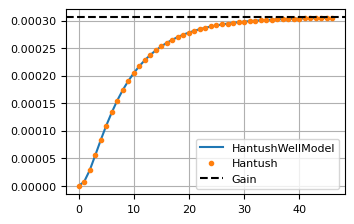

In [46]:
# compare pastas.Hantush to pastas.HantushWellModel

hantush = ps.Hantush()
hantush.update_rfunc_settings(up=False)
hantushwm = ps.HantushWellModel()
hantushwm.update_rfunc_settings(up=False)
hantushwm.set_distances(1.0)

bprime = np.log(1 / (4 * T * c))
Aprime = A / k0(2 * r * np.exp(bprime / 2))

h = hantush.step([A, a, b], dt=1, cutoff=0.99)
hwm = hantushwm.step([Aprime, a, bprime, r], dt=1, cutoff=0.99)

plt.plot(hwm, "-", label="HantushWellModel")
plt.plot(h, ".", label="Hantush")
plt.axhline(A, ls="dashed", color="k", label="Gain")
plt.legend()
plt.grid();